## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [22]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os 
os.environ["OMP_NUM_THREADS"] = "1" # Limit threads to 1

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Random state seed
rseed = 42

## Load and explore data

In [24]:
# Import the dataset
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [25]:
# Check the shape
df.shape

(167, 10)

In [26]:
# Check datatypes & counts
print('Datatypes\n')
print(df.dtypes)

print('\nCounts:\n')
print(df.count())

Datatypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

Counts:

country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64


In [27]:
# Get descriptive statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [28]:
# Identify any missing data
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [29]:
# Drop any non-numeric features (columns)
df = df.drop(['country'], axis=1)

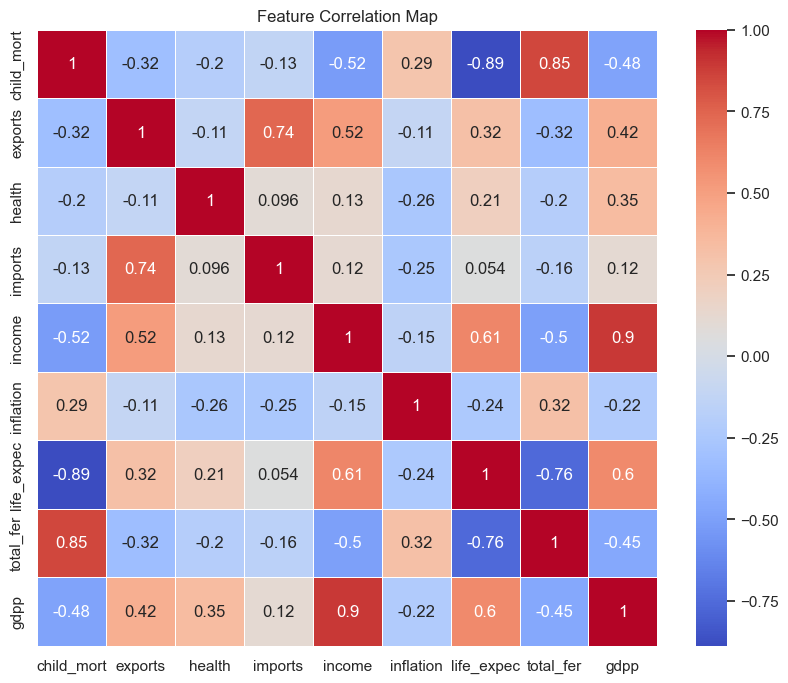

In [30]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Map')
plt.show()

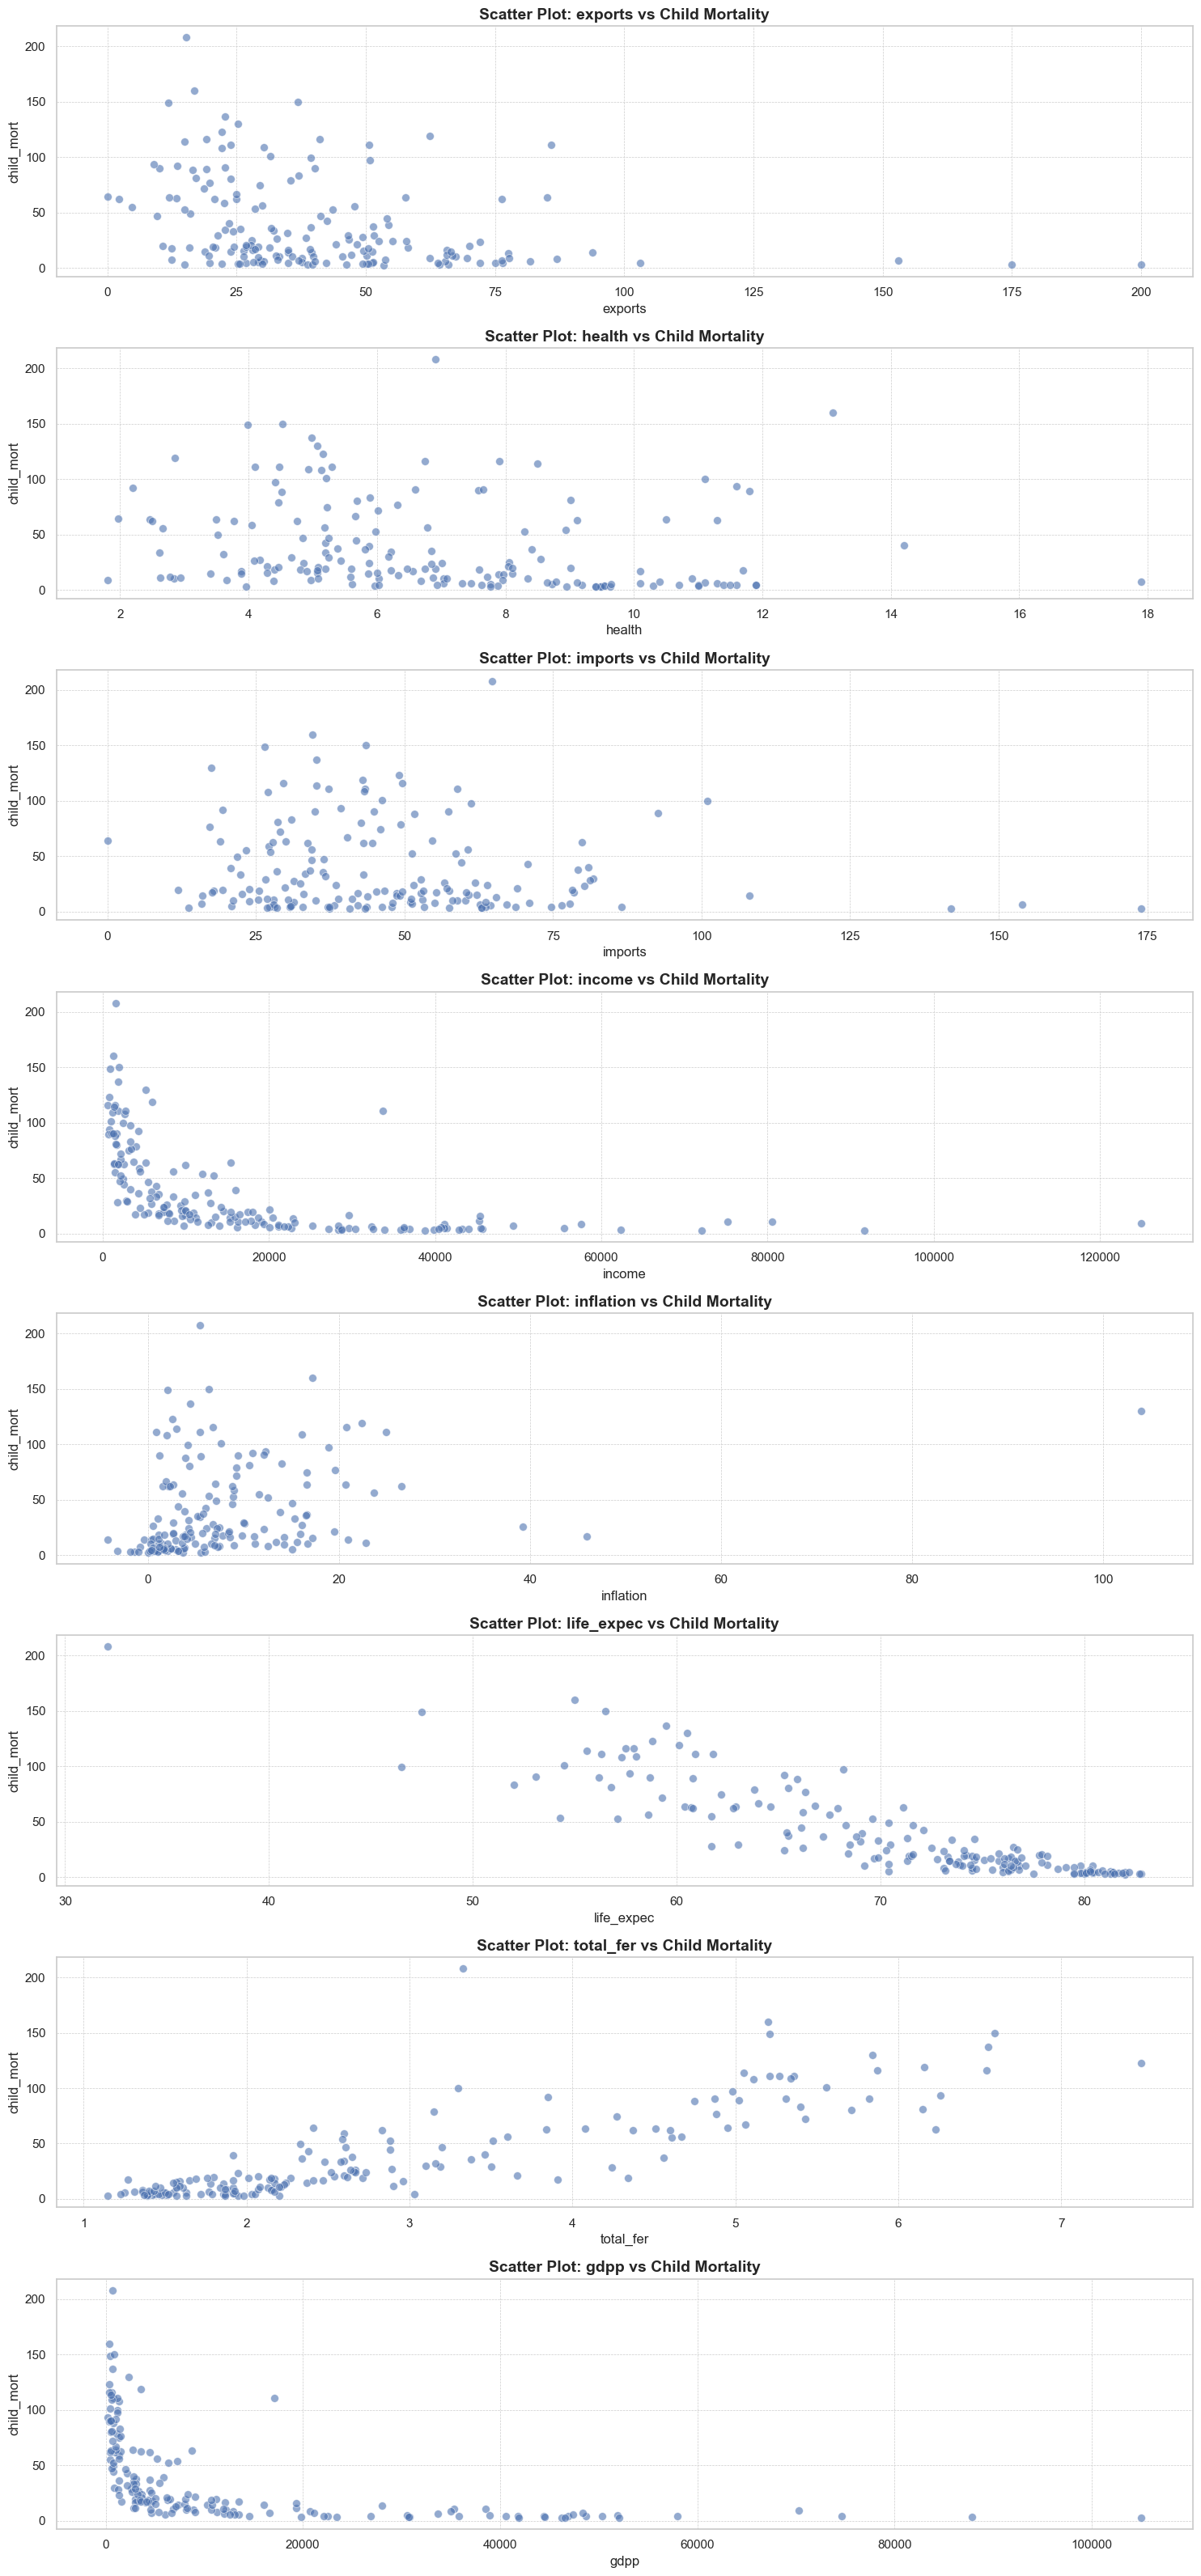

In [31]:
# Explore the continuous independent features against child_mort using scatter plots.
numeric_features = df.select_dtypes(include='number').columns.tolist()
numeric_features = [feature for feature in numeric_features if feature != 'child_mort']

# Set clean style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(15, len(numeric_features)* 4))

for i, feature in enumerate(numeric_features):
    plt.subplot(len(numeric_features), 1, i + 1)
    sns.scatterplot(data=df, x=feature, y='child_mort', color='b', alpha=0.6, s=50)
    plt.title(f'Scatter Plot: {feature} vs Child Mortality', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('child_mort', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

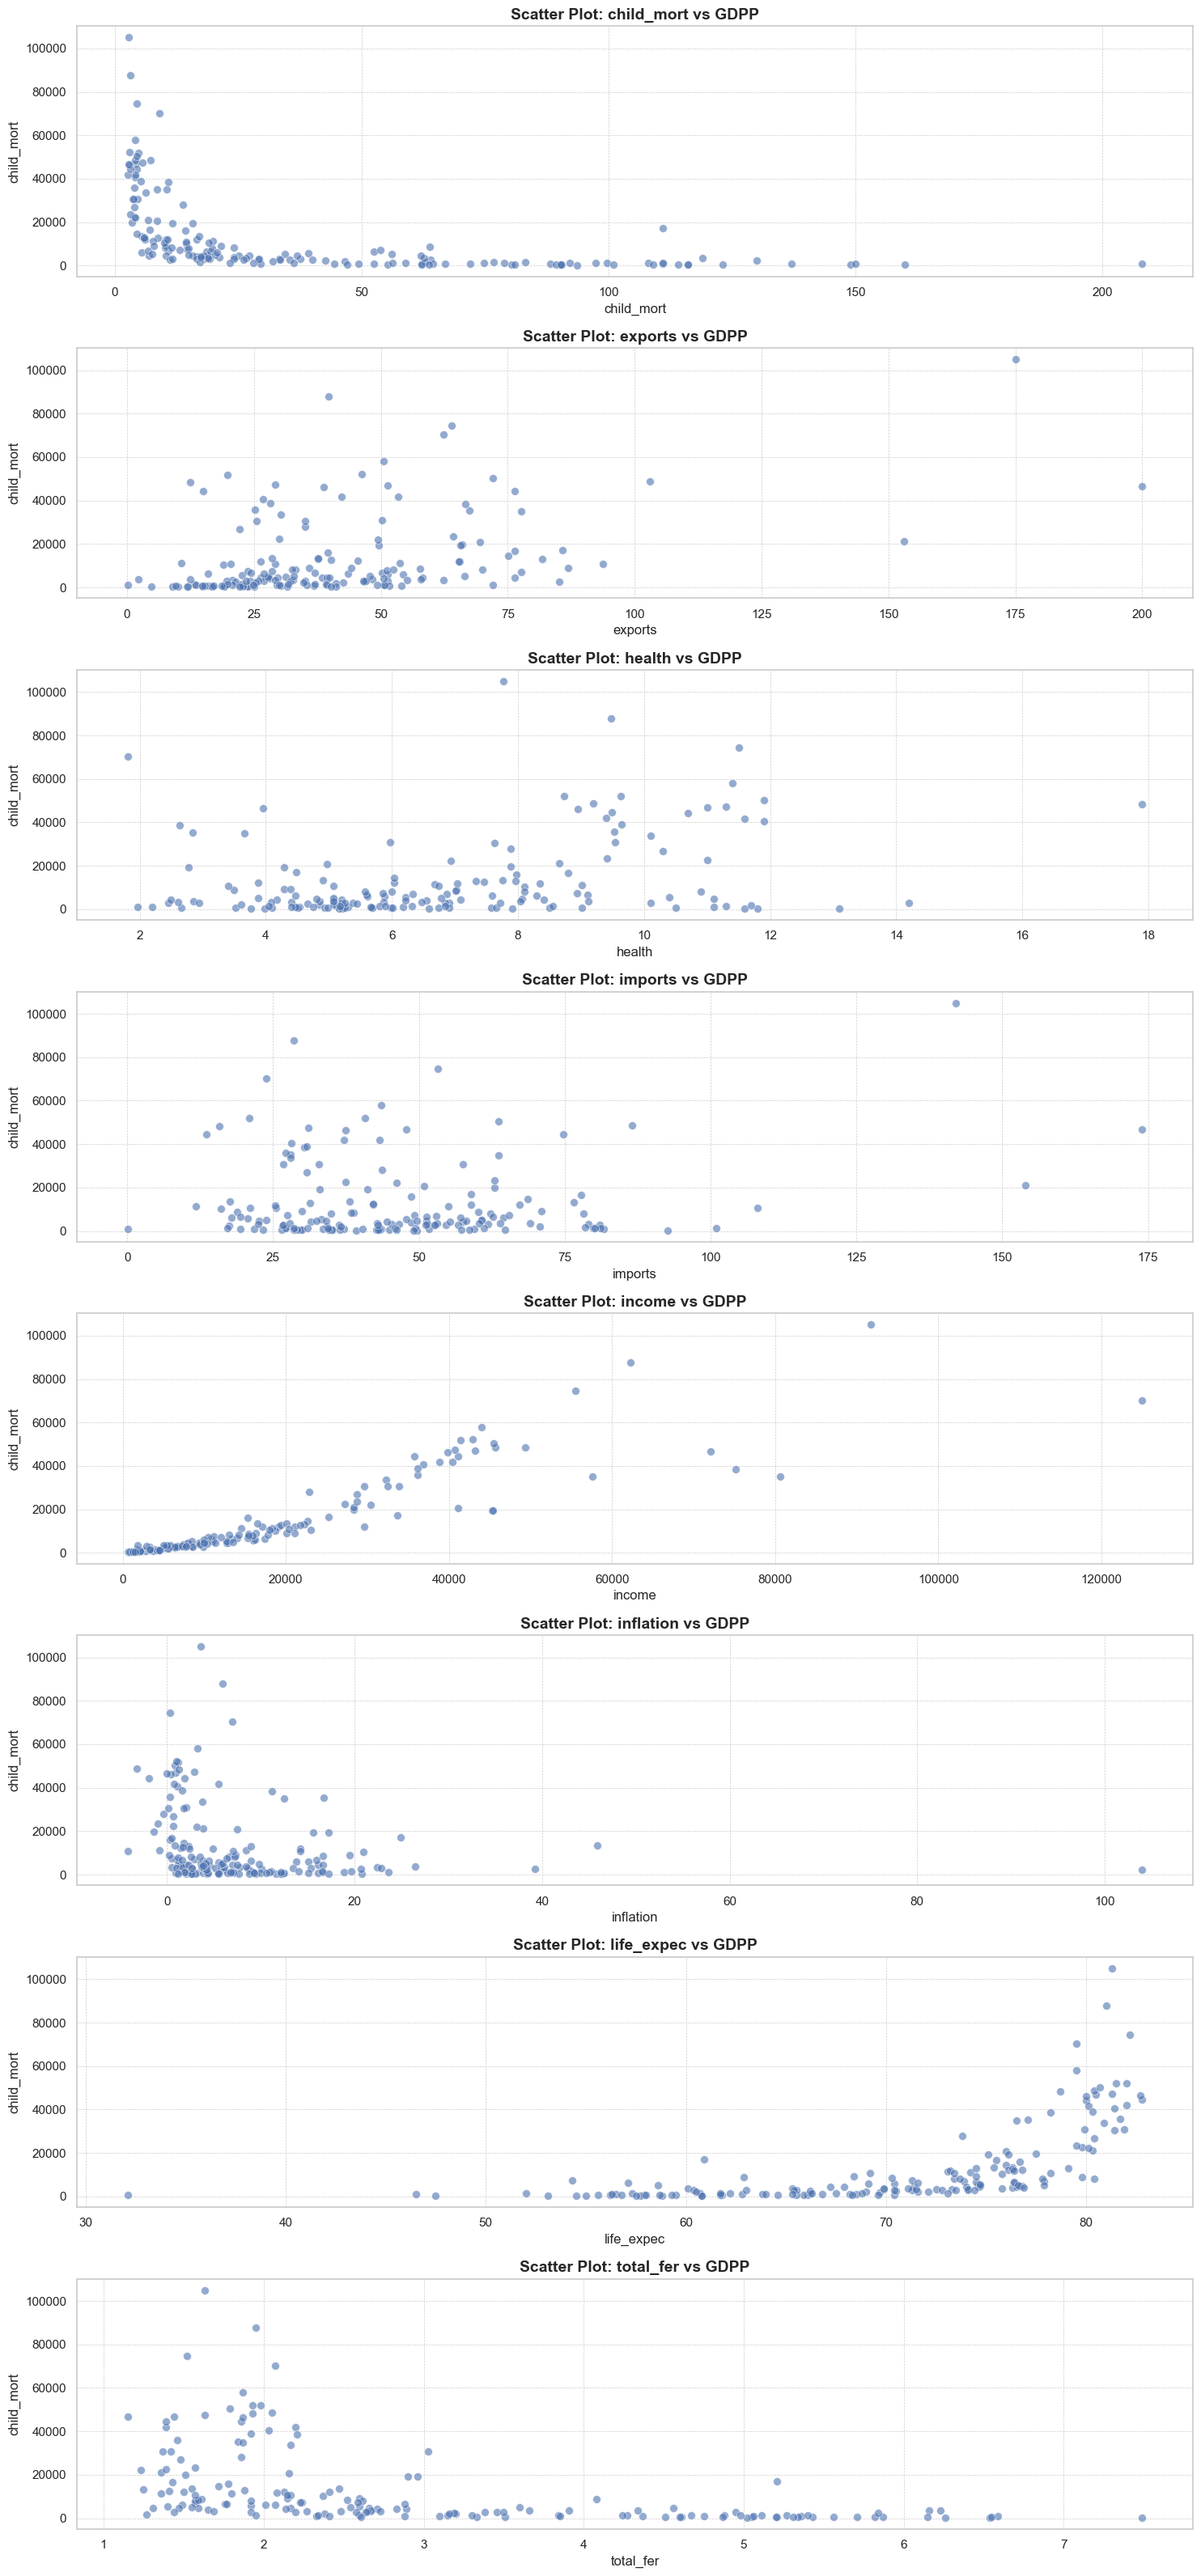

In [32]:
# Explore the continuous independent features against gdpp using scatter plots.
# Explore the continuous independent features against child_mort using scatter plots.
numeric_features = df.select_dtypes(include='number').columns.tolist()
numeric_features = [feature for feature in numeric_features if feature != 'gdpp']

# Set clean style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(15, len(numeric_features)* 4))

for i, feature in enumerate(numeric_features):
    plt.subplot(len(numeric_features), 1, i + 1)
    sns.scatterplot(data=df, x=feature, y='gdpp', color='b', alpha=0.6, s=50)
    plt.title(f'Scatter Plot: {feature} vs GDPP', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('child_mort', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

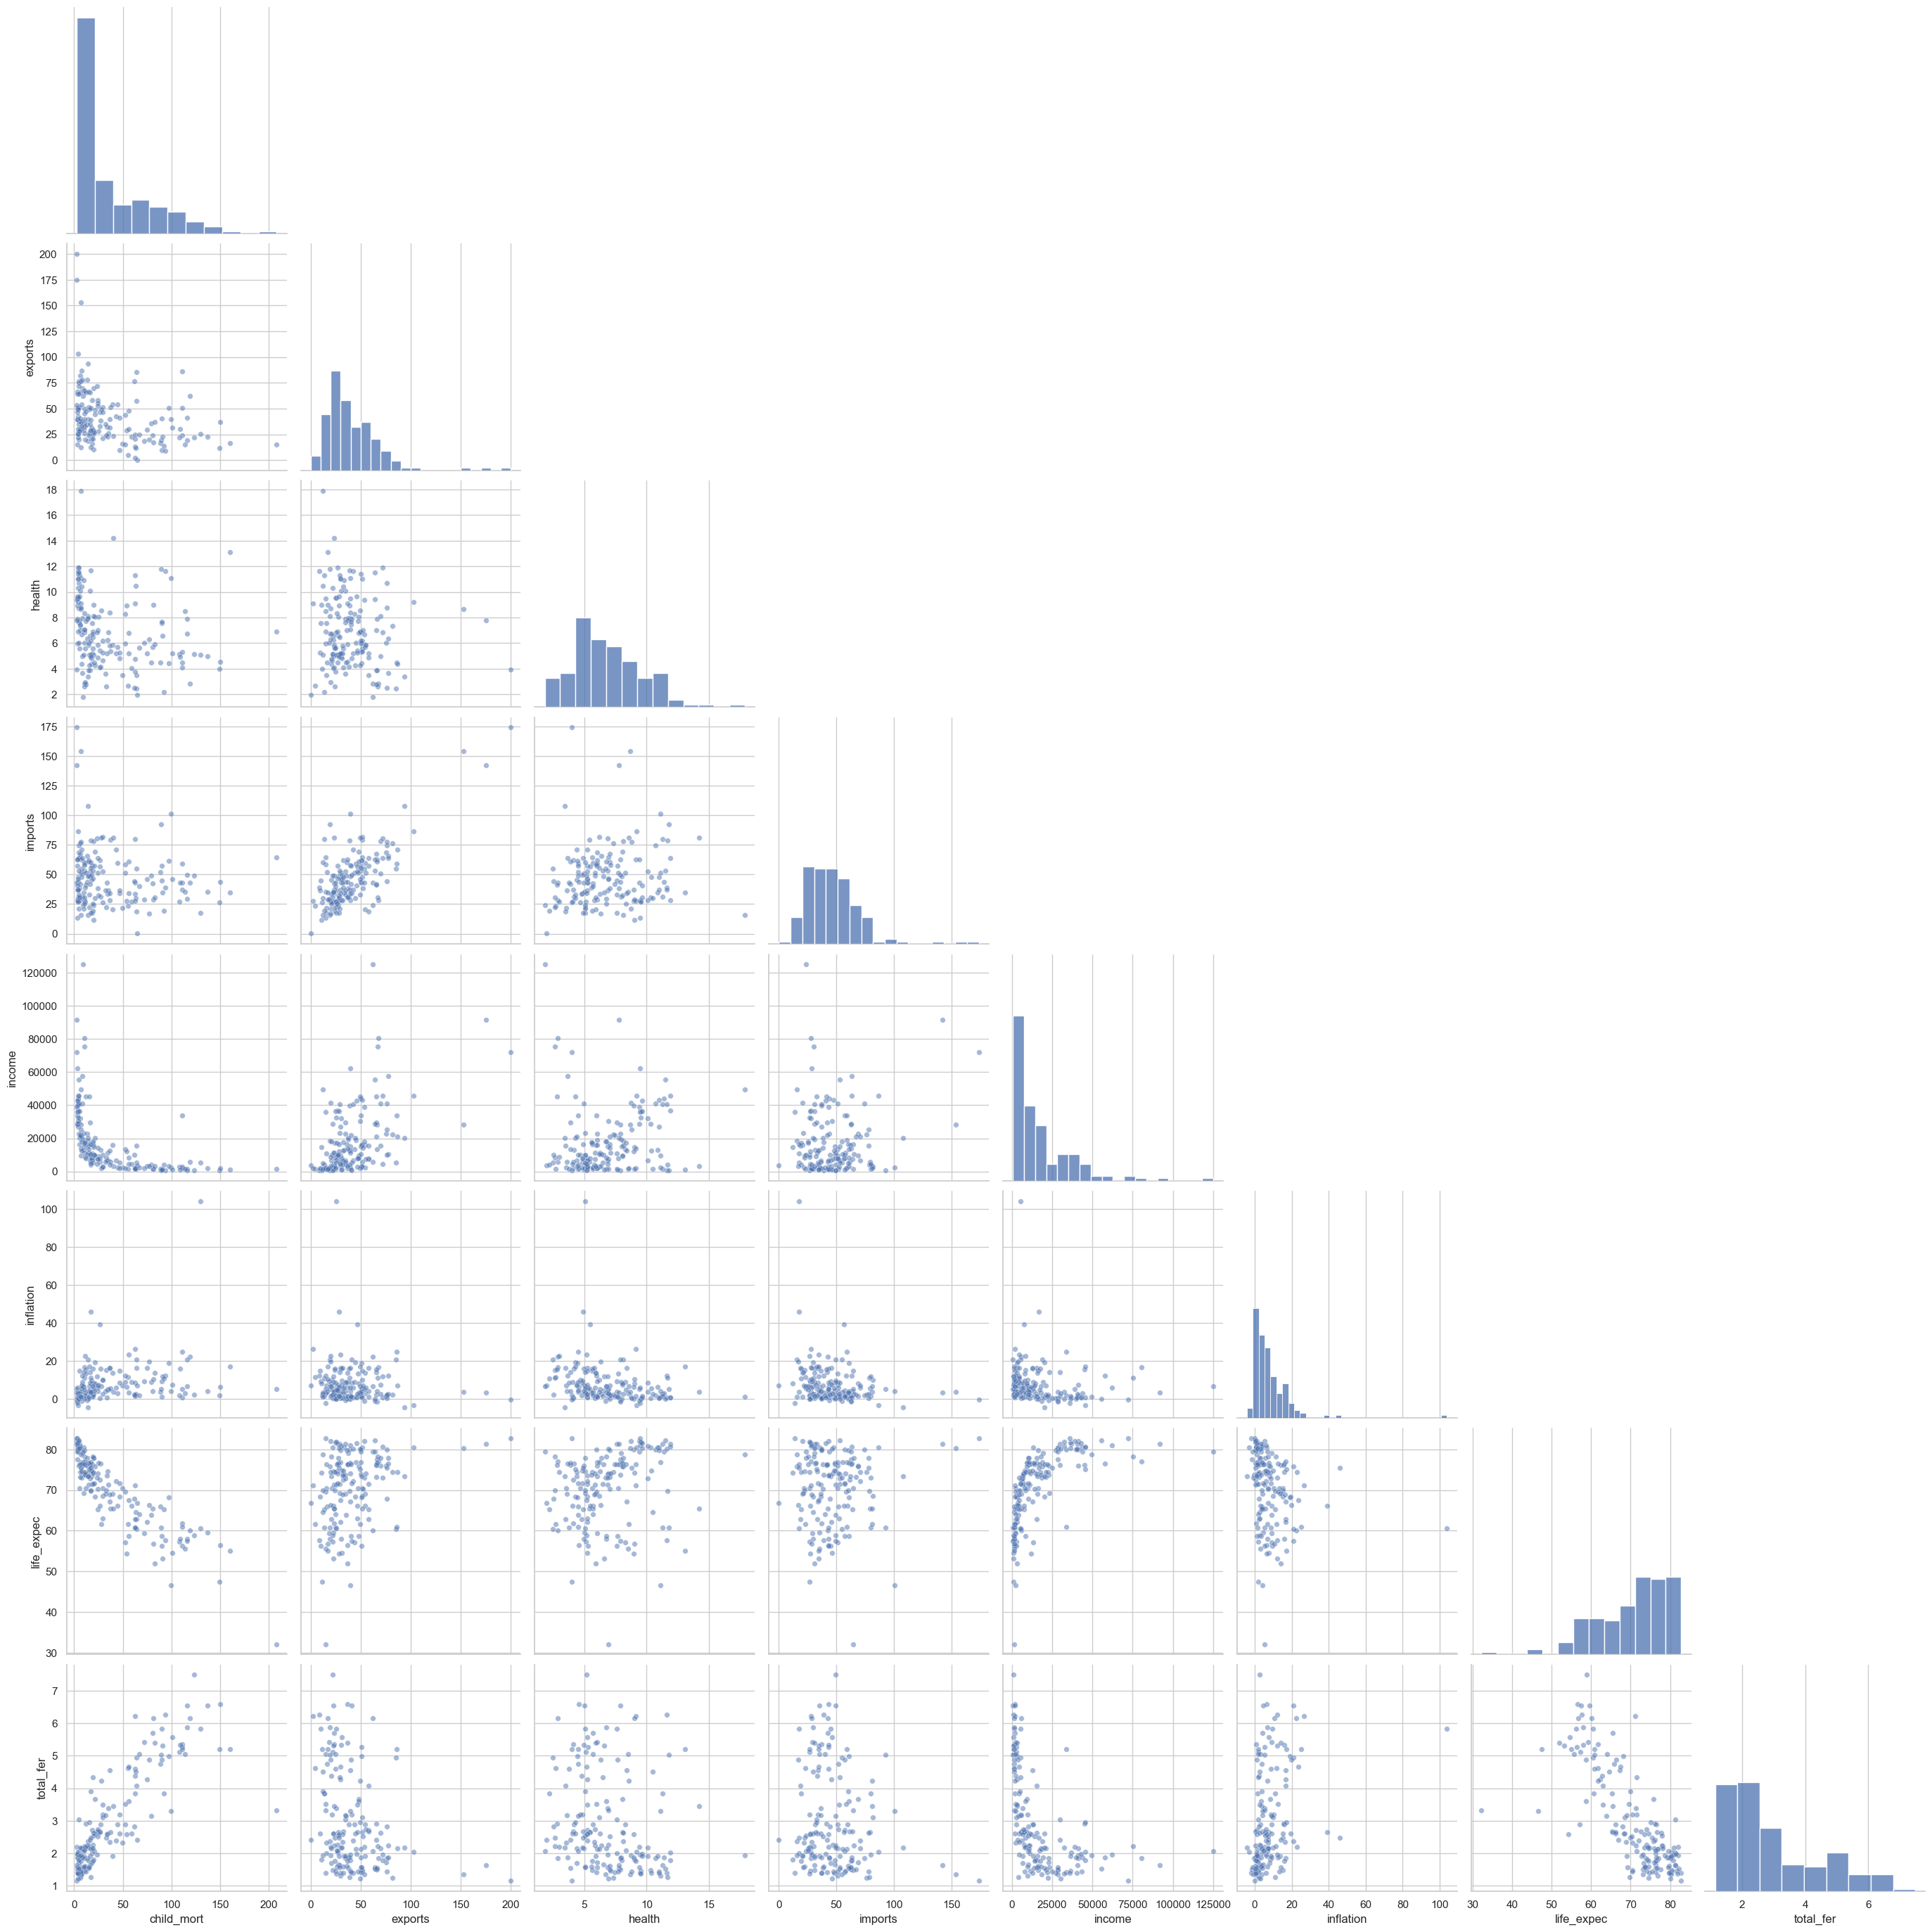

In [33]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.set(style="whitegrid")

# Create the pairplot
sns.pairplot(df[numeric_features], 
             corner=True, 
             height=3.5, 
             aspect=1,
             plot_kws={'alpha': 0.5, 's': 30}
             )

# Show the plot
plt.show()

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [34]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
numeric_df = df.select_dtypes(include='number')

scaler = MinMaxScaler()

# Fit and transform the data
X = scaler.fit_transform(numeric_df)

# Convert back to DataFrame with original column names
df_scaled = pd.DataFrame(X, columns=numeric_df.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

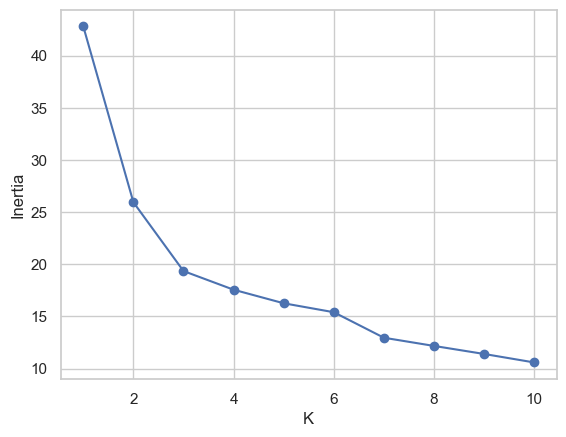

In [35]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled datase
elbow_Kmeans(X)    

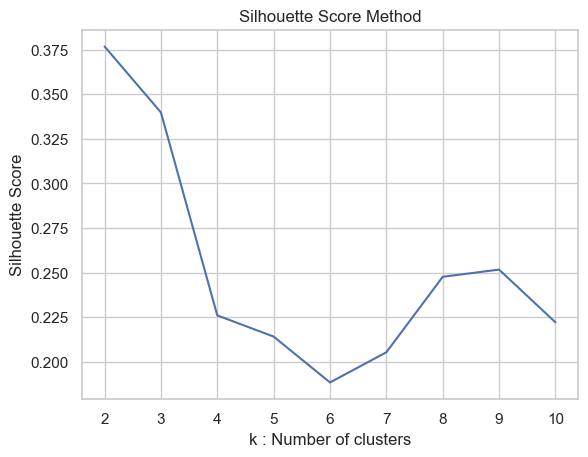

In [36]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

K = 2

## Fitting a K-Means Model with the selected K value

In [37]:
# Remember to set the random_state to rseed

In [38]:
# Count the number of records in each cluster
optimal_k = 3  

# Predict cluster labels
final_kmeans = KMeans(n_clusters=optimal_k, random_state = rseed, max_iter=500)
clusters = final_kmeans.fit_predict(df_scaled) 

# Add clusters back to data
df['Cluster'] = clusters  

cluster_counts = df['Cluster'].value_counts().sort_index()

print("Number of records in each cluster:")
print(cluster_counts)

Number of records in each cluster:
Cluster
0    87
1    35
2    45
Name: count, dtype: int64


In [39]:
# Check model performance with the silhouette coefficient
silhouette_avg = silhouette_score(df_scaled, clusters, metric='euclidean')
print(f'Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}')

Silhouette Score for K=3: 0.3398


## Predictions

In [40]:
# Add the predicted cluster label column to the original dataframe
# Has already been predicted

## Visualisation of clusters

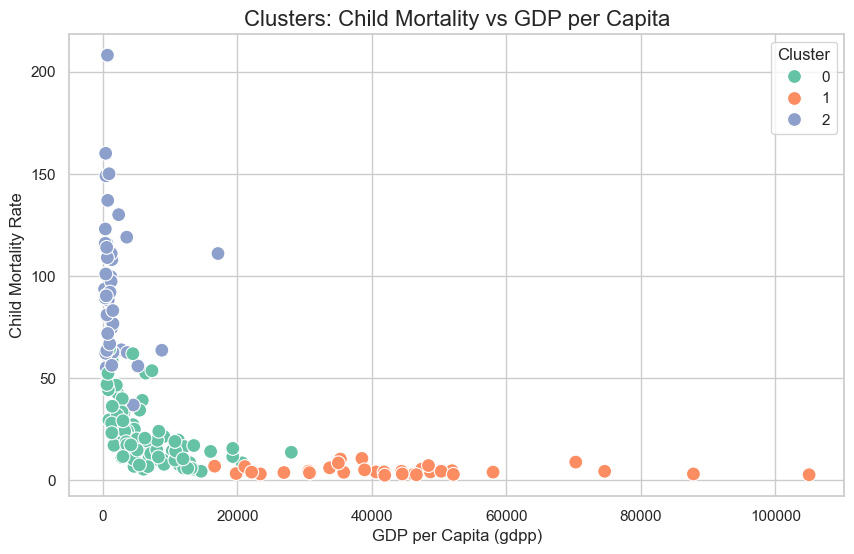

In [ ]:
# Visualisation of clusters: child mortality vs gdpp
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdpp', y='child_mort', hue='Cluster', palette='Set2', s=100)

plt.title('Clusters: Child Mortality vs GDPP per Capita', fontsize=16)
plt.xlabel('GDP per Capita (gdpp)', fontsize=12)
plt.ylabel('Child Mortality Rate', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

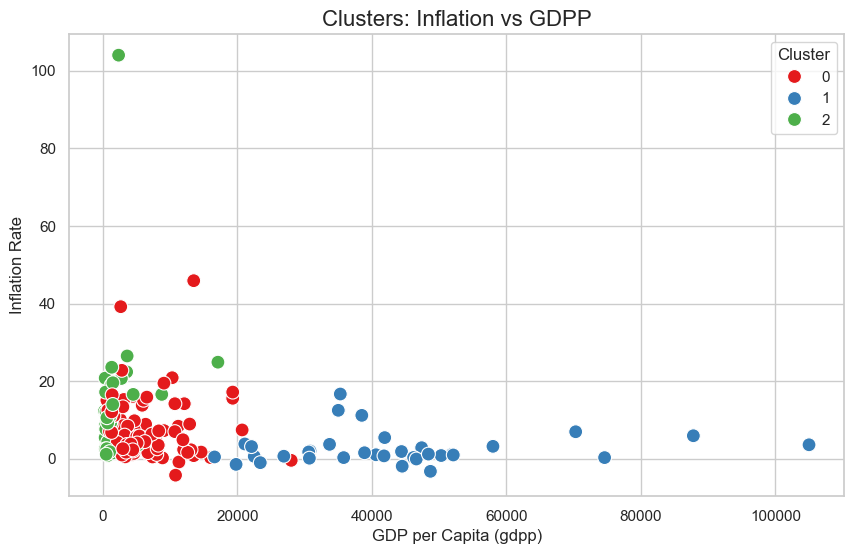

In [42]:
# Visualisation of clusters: inflation vs gdpp
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdpp', y='inflation', hue='Cluster', palette='Set1', s=100)

plt.title('Clusters: Inflation vs GDPP', fontsize=16)
plt.xlabel('GDP per Capita (gdpp)', fontsize=12)
plt.ylabel('Inflation Rate', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

## Cluster: Child Mortality vs GDPP per Capita
Cluster 2 (blue) - Least developed

Justify - The GDPP of these countries is $20000< and they have an average Child Mortality rate of above 50.

Cluster 0 (green) - Developing

Justify - Average GDPP of $20000< and average Child Mortality rate is less than 50.

Cluster 1 (orange) - Developed

Justify - GDPP of the countries is between $15000 - $120000. Child Mortality rates are lowest at an average of less than 30.

## Cluster: Inflation vs GDPP
Cluster 2 (green) - Least developed

Justify - Inflation ranges from 0 to above 100. GDPP ranges from 0 - $20000.

Cluster 0 (red) - Developing

Justify - GDPP ranges betwwen 0 - $30000. Inflation ranges from no inflation to around 50.

Cluster 1 (blue) - Developed

Justify - GDPP ranges betwwen $15000 - $120000. Inflation ranges from no inflation to around 20. 